## 비만지수를 데이타셋에서 기계학습을 하고 시각화하기



[ 예를 들어 ]

- SVM을 이용하고 산점도 그래프 그리기
- 랜덤포레스트 이용하고 그래프 그리기
- 그 외 모델을 이용

In [88]:
from sklearn import svm, metrics, datasets, metrics
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 데이타 읽어오기
tbl = pd.read_csv('../data/bmi/bmi.csv')
tbl.head()

,height,weight,label
0,194,68,저체중
1,196,45,저체중
2,171,51,저체중
3,190,44,저체중
4,142,76,비만


## 로지스터 회귀 방법


In [26]:
data = tbl[['height','weight','label']]
data[['height','weight']] =  data[['height','weight']].astype(str)
data.dtypes
data['label']

0        저체중
1        저체중
2        저체중
3        저체중
4         비만
        ... 
9995      비만
9996      비만
9997     저체중
9998    정상체중
9999      비만
Name: label, Length: 10000, dtype: object

In [27]:
# train_data = data.columns[1:]
# train_label = data['label']

# logit = sm.Logit(train_label,data[train_data])

# result = logit.fit()

## knn 방식

In [33]:
iris = datasets.load_iris()
x = iris['data']
x[:10]
y=iris['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)
print(x_train.shape)

(112, 4)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

print

KNeighborsClassifier(n_neighbors=1)

In [36]:
# pred = knn.predict()

## svm 방식

In [96]:
temp = tbl
temp['bmi'] = tbl['weight'] / (tbl['height']**2)
temp

,height,weight,label,bmi
0,194,68,저체중,0.001807
1,196,45,저체중,0.001171
2,171,51,저체중,0.001744
3,190,44,저체중,0.001219
4,142,76,비만,0.003769
...,...,...,...,...
9995,155,69,비만,0.002872
9996,172,74,비만,0.002501
9997,168,43,저체중,0.001524
9998,192,76,정상체중,0.002062


In [97]:
bmi = temp[['bmi']]
y = temp[['label']]
x_train, x_test, y_train, y_test = train_test_split(bmi,y, test_size = 0.3, random_state = 0)


In [101]:
model = svm.SVC()
model.fit(x_train,y_train)

pred = model.predict(x_test)
print(pred)

print(model.score(x_test,y_test))
print(metrics.accuracy_score(y_test,pred))


['정상체중' '비만' '비만' ... '저체중' '비만' '비만']
0.9966666666666667
0.9966666666666667


C:\Users\kosmo_04\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


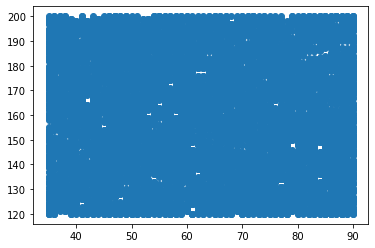

In [115]:
plt.scatter(temp['weight'],temp['height'])

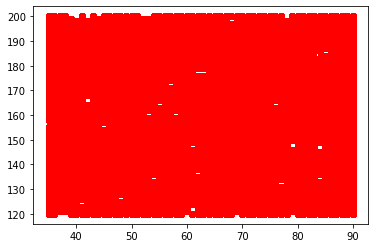

In [113]:
c_lst = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, len(set(temp['bmi'])))]
for i, g in enumerate(temp.groupby('bmi')):
    plt.scatter(temp['weight'],temp['height'],color=c_lst[i], label='group {}'.format(int(g[0])), alpha=0.5)